# Project 4 - Part 1 - Seasonality

## Exploring Sydney Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading in the .csv file and displaying the result saved to a DataFrame

In [5]:
sydney = pd.read_csv('../Original files/IDCJAC0010_066062_1800_Data.csv')
sydney

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y
...,...,...,...,...,...,...,...,...
59042,IDCJAC0010,66062,2020,8,26,19.6,1.0,Y
59043,IDCJAC0010,66062,2020,8,27,22.2,1.0,Y
59044,IDCJAC0010,66062,2020,8,28,19.7,1.0,Y
59045,IDCJAC0010,66062,2020,8,29,21.5,1.0,Y


Initial exploration of the sydney DF

In [6]:
sydney.nunique()

Product code                                     1
Bureau of Meteorology station number             1
Year                                           162
Month                                           12
Day                                             31
Maximum temperature (Degree C)                 334
Days of accumulation of maximum temperature      2
Quality                                          1
dtype: int64

In [7]:
sydney.isnull().sum()

Product code                                     0
Bureau of Meteorology station number             0
Year                                             0
Month                                            0
Day                                              0
Maximum temperature (Degree C)                 152
Days of accumulation of maximum temperature    285
Quality                                        153
dtype: int64

In [8]:
sydney.columns = ['prod_id','station_id','year','month',
                'day','max_temp','days_accumulated','quality']
sydney

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y
...,...,...,...,...,...,...,...,...
59042,IDCJAC0010,66062,2020,8,26,19.6,1.0,Y
59043,IDCJAC0010,66062,2020,8,27,22.2,1.0,Y
59044,IDCJAC0010,66062,2020,8,28,19.7,1.0,Y
59045,IDCJAC0010,66062,2020,8,29,21.5,1.0,Y


In [9]:
sydney['days_accumulated'].value_counts()

1.0    58761
2.0        1
Name: days_accumulated, dtype: int64

In [10]:
sydney[sydney['days_accumulated']==2.0]

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality
50219,IDCJAC0010,66062,1996,6,30,18.4,2.0,Y


In [11]:
sydney['quality'].value_counts()

Y    58894
Name: quality, dtype: int64

The column 'quality' relates to whether the station could read in data reliably for the day. For NaN values the max_temp isn't reliable.

In [12]:
sydney[sydney['quality'] != 'Y']

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality
720,IDCJAC0010,66062,1860,12,21,NaN,NaN,NaN
1905,IDCJAC0010,66062,1864,3,20,NaN,NaN,NaN
2367,IDCJAC0010,66062,1865,6,25,NaN,1.0,NaN
3330,IDCJAC0010,66062,1868,2,13,NaN,NaN,NaN
3748,IDCJAC0010,66062,1869,4,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
50335,IDCJAC0010,66062,1996,10,24,NaN,NaN,NaN
50336,IDCJAC0010,66062,1996,10,25,NaN,NaN,NaN
55143,IDCJAC0010,66062,2009,12,23,NaN,NaN,NaN
55144,IDCJAC0010,66062,2009,12,24,NaN,NaN,NaN


The 'days_accumalated' column also contains a lot of Nan values.

In [13]:
sydney[sydney['days_accumulated'].isnull()]

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
720,IDCJAC0010,66062,1860,12,21,NaN,NaN,NaN
721,IDCJAC0010,66062,1860,12,22,20.9,NaN,Y
1905,IDCJAC0010,66062,1864,3,20,NaN,NaN,NaN
1906,IDCJAC0010,66062,1864,3,21,19.6,NaN,Y
...,...,...,...,...,...,...,...,...
50334,IDCJAC0010,66062,1996,10,23,NaN,NaN,NaN
50335,IDCJAC0010,66062,1996,10,24,NaN,NaN,NaN
50336,IDCJAC0010,66062,1996,10,25,NaN,NaN,NaN
55143,IDCJAC0010,66062,2009,12,23,NaN,NaN,NaN


In [14]:
sydney.dtypes

prod_id              object
station_id            int64
year                  int64
month                 int64
day                   int64
max_temp            float64
days_accumulated    float64
quality              object
dtype: object

In [15]:
sydney.shape

(59047, 8)

### Dealing with Nulls

Looking for instances where all recorded data (max_temp, days_accumulated, quality) are null. Searched for alternate datasets to impute values, however no sources are of a close enough relevance to impute without compromising integrity. It is better to remove values, or impute with mean.

In [16]:
sydney[(sydney['quality'].isnull()) & (sydney['max_temp'].isnull()) & (sydney['days_accumulated'].isnull())]

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality
720,IDCJAC0010,66062,1860,12,21,NaN,NaN,NaN
1905,IDCJAC0010,66062,1864,3,20,NaN,NaN,NaN
3330,IDCJAC0010,66062,1868,2,13,NaN,NaN,NaN
3748,IDCJAC0010,66062,1869,4,6,NaN,NaN,NaN
4074,IDCJAC0010,66062,1870,2,26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
50334,IDCJAC0010,66062,1996,10,23,NaN,NaN,NaN
50335,IDCJAC0010,66062,1996,10,24,NaN,NaN,NaN
50336,IDCJAC0010,66062,1996,10,25,NaN,NaN,NaN
55143,IDCJAC0010,66062,2009,12,23,NaN,NaN,NaN


Adding new column, rolling average. Calculated off a 3 day window, using the day before and the day after

In [17]:
sydney['rolling_avg'] = round(sydney['max_temp'].rolling(3, min_periods=1, center=True).mean(), 1)

Find remaining instances of nulls due to too much missing data for a window of 2 days

In [18]:
sydney[sydney['rolling_avg'].isnull() == True]

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality,rolling_avg
50334,IDCJAC0010,66062,1996,10,23,NaN,NaN,NaN,NaN
50335,IDCJAC0010,66062,1996,10,24,NaN,NaN,NaN,NaN


checking distribution of rolling_avg is similar to max_temp, and hence can be used as an accurate placeholder

In [19]:
sydney[(sydney['year'] == 1996) & (sydney['month'] == 10) & (sydney['day'] > 15)]

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality,rolling_avg
50327,IDCJAC0010,66062,1996,10,16,24.9,1.0,Y,23.7
50328,IDCJAC0010,66062,1996,10,17,NaN,NaN,NaN,24.0
50329,IDCJAC0010,66062,1996,10,18,23.1,1.0,Y,25.1
50330,IDCJAC0010,66062,1996,10,19,27.1,1.0,Y,22.2
50331,IDCJAC0010,66062,1996,10,20,16.5,1.0,Y,20.7
50332,IDCJAC0010,66062,1996,10,21,18.6,1.0,Y,17.5
50333,IDCJAC0010,66062,1996,10,22,NaN,NaN,NaN,18.6
50334,IDCJAC0010,66062,1996,10,23,NaN,NaN,NaN,NaN
50335,IDCJAC0010,66062,1996,10,24,NaN,NaN,NaN,NaN
50336,IDCJAC0010,66062,1996,10,25,NaN,NaN,NaN,18.5


Remaining 2 NaNs are due to a large blip in recording. Use rolling average to impute these values.

In [20]:
sydney.loc[(sydney['rolling_avg'].isnull() == True), 'rolling_avg'] = \
round(sydney['rolling_avg'].rolling(3, min_periods=1, center=True).mean(), 1)

In [21]:
sydney[(sydney['year'] == 1996) & (sydney['month'] == 10) & (sydney['day'] > 20)]

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality,rolling_avg
50332,IDCJAC0010,66062,1996,10,21,18.6,1.0,Y,17.5
50333,IDCJAC0010,66062,1996,10,22,NaN,NaN,NaN,18.6
50334,IDCJAC0010,66062,1996,10,23,NaN,NaN,NaN,18.6
50335,IDCJAC0010,66062,1996,10,24,NaN,NaN,NaN,18.5
50336,IDCJAC0010,66062,1996,10,25,NaN,NaN,NaN,18.5
50337,IDCJAC0010,66062,1996,10,26,18.5,1.0,Y,18.7
50338,IDCJAC0010,66062,1996,10,27,18.9,1.0,Y,20.0
50339,IDCJAC0010,66062,1996,10,28,22.5,1.0,Y,21.3
50340,IDCJAC0010,66062,1996,10,29,22.5,1.0,Y,22.6
50341,IDCJAC0010,66062,1996,10,30,22.7,1.0,Y,21.5


In [22]:
sydney.loc[(sydney['max_temp'].isnull() == True), 'max_temp'] = sydney['rolling_avg']

Check values have been imputed

In [23]:
sydney[(sydney['year'] == 1996) & (sydney['month'] == 10) & (sydney['day'] > 20)]

,prod_id,station_id,year,month,day,max_temp,days_accumulated,quality,rolling_avg
50332,IDCJAC0010,66062,1996,10,21,18.6,1.0,Y,17.5
50333,IDCJAC0010,66062,1996,10,22,18.6,NaN,NaN,18.6
50334,IDCJAC0010,66062,1996,10,23,18.6,NaN,NaN,18.6
50335,IDCJAC0010,66062,1996,10,24,18.5,NaN,NaN,18.5
50336,IDCJAC0010,66062,1996,10,25,18.5,NaN,NaN,18.5
50337,IDCJAC0010,66062,1996,10,26,18.5,1.0,Y,18.7
50338,IDCJAC0010,66062,1996,10,27,18.9,1.0,Y,20.0
50339,IDCJAC0010,66062,1996,10,28,22.5,1.0,Y,21.3
50340,IDCJAC0010,66062,1996,10,29,22.5,1.0,Y,22.6
50341,IDCJAC0010,66062,1996,10,30,22.7,1.0,Y,21.5


## Question 1 - Identify Seasonality

The average maximum daily temperature since records began..

In [24]:
mean_temp = sydney['max_temp'].mean()
print(f"{round(sydney['max_temp'].mean(),4)} \N{DEGREE SIGN}C")

21.7458 °C


Drilling down, the average temperature by month..

In [25]:
month_temp = pd.DataFrame(sydney.groupby(by=sydney['month'])['max_temp'].mean())
month_temp['month_name'] = pd.Series(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).values
month_temp

,max_temp,month_name
month,,
1,26.010056,Jan
2,25.839598,Feb
3,24.809299,Mar
4,22.514856,Apr
5,19.531282,May
6,17.011008,Jun
7,16.422322,Jul
8,17.891794,Aug
9,20.084824,Sep


Plotting it! The dotted line is the overall average temperature found initially

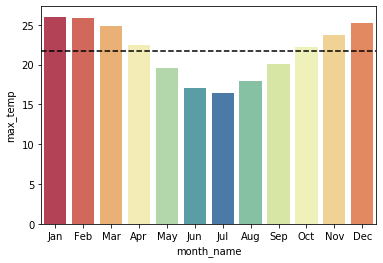

In [26]:
pal = sns.color_palette("Spectral", 12)
rank = month_temp['max_temp'].argsort().argsort()

g = sns.barplot(data=month_temp, x='month_name', 
                y='max_temp', palette = np.array(pal[::-1])[rank])
g.axhline(sydney['max_temp'].mean(), color='black', linestyle='--');

Calculating the difference of the months average tempratures from the overall average temprature

In [27]:
month_temp['temp_diff'] = month_temp['max_temp'] - mean_temp
month_temp

,max_temp,month_name,temp_diff
month,,,
1,26.010056,Jan,4.264233
2,25.839598,Feb,4.093775
3,24.809299,Mar,3.063476
4,22.514856,Apr,0.769033
5,19.531282,May,-2.214540
6,17.011008,Jun,-4.734815
7,16.422322,Jul,-5.323501
8,17.891794,Aug,-3.854028
9,20.084824,Sep,-1.660999


## Question 2 - Seasonality Correction

Merging the monthly temperature DF onto the main daily temperature DF

In [28]:
syd_lookup = sydney.merge(month_temp, how='left', on='month', validate='m:1', suffixes=('_syd', '_mon'))

Creating a column of adjusted temperatures from the merged DF

In [29]:
syd_lookup['max_temp_adj'] = syd_lookup['max_temp_syd'] - syd_lookup['temp_diff']
syd_lookup[['year','month','day','max_temp_mon','temp_diff','max_temp_adj']]

,year,month,day,max_temp_mon,temp_diff,max_temp_adj
0,1859,1,1,26.010056,4.264233,20.135767
1,1859,1,2,26.010056,4.264233,20.135767
2,1859,1,3,26.010056,4.264233,19.935767
3,1859,1,4,26.010056,4.264233,20.435767
4,1859,1,5,26.010056,4.264233,20.335767
...,...,...,...,...,...,...
59042,2020,8,26,17.891794,-3.854028,23.454028
59043,2020,8,27,17.891794,-3.854028,26.054028
59044,2020,8,28,17.891794,-3.854028,23.554028
59045,2020,8,29,17.891794,-3.854028,25.354028


Grouping the two temperature columns by year

In [30]:
temp_adj = syd_lookup.groupby(by='year', as_index=False)[['max_temp_adj', 'max_temp_syd']].mean()
temp_adj

,year,max_temp_adj,max_temp_syd
0,1859,21.400086,21.399452
1,1860,20.270868,20.281421
2,1861,20.865292,20.864658
3,1862,21.353785,21.353151
4,1863,20.959812,20.959178
...,...,...,...
157,2016,23.829611,23.840164
158,2017,23.678442,23.677808
159,2018,23.363648,23.363014
160,2019,24.015429,24.014795


Finally plotting the change in temperature over time! 😓

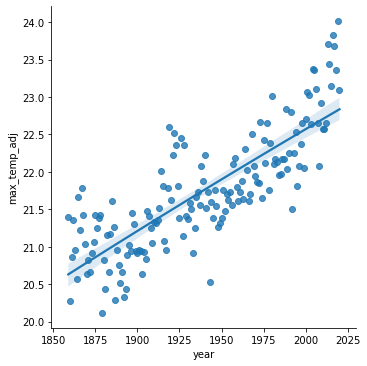

In [31]:
sns.lmplot(data=temp_adj, x='year', y='max_temp_adj', logx=True);

# Part 2 - Manua Loa

### Exploring Manua Loa

Reading in Mauna Loa dataset

In [59]:
mauna = pd.read_csv('mauna_loa_co2_levels.csv')

Renaming columns to suit convention

In [60]:
mauna.columns = ['year', 'month', 'co2_ppm']

Checking for nulls

In [61]:
mauna.isnull().sum()

year       0
month      0
co2_ppm    0
dtype: int64

In [62]:
mauna[mauna['co2_ppm'] < 0 ].head()

,year,month,co2_ppm
3,1958,6,-99.99
7,1958,10,-99.99
71,1964,2,-99.99
72,1964,3,-99.99
73,1964,4,-99.99


Instances where co2_ppm = -99.99 are null values. As these values span a large time frame, imputing a mean value for a month may skew the data for a calculation of that year. Leaving them in will will also skew data. Removing.

In [63]:
mauna = mauna[mauna['co2_ppm'] > 0 ]

In [64]:
mauna

,year,month,co2_ppm
0,1958,3,315.70
1,1958,4,317.46
2,1958,5,317.51
4,1958,7,315.86
5,1958,8,314.93
...,...,...,...
750,2020,9,411.26
751,2020,10,411.23
752,2020,11,412.95
753,2020,12,413.95


Checking length of 'month' string where month is only 1 digit.

In [65]:
len(mauna['month'].map(str).loc[2])

1

Creating new dataset with datetime format date strings (for Tableau).

In [66]:
test_mauna = mauna
test_mauna['date'] = test_mauna['year'].map(str) + '-' + test_mauna['month'].map(str) + '-01'
test_mauna

,year,month,co2_ppm,date
0,1958,3,315.70,1958-3-01
1,1958,4,317.46,1958-4-01
2,1958,5,317.51,1958-5-01
4,1958,7,315.86,1958-7-01
5,1958,8,314.93,1958-8-01
...,...,...,...,...
750,2020,9,411.26,2020-9-01
751,2020,10,411.23,2020-10-01
752,2020,11,412.95,2020-11-01
753,2020,12,413.95,2020-12-01


Create a new dataframe to merge Sydney data - Year, month, and mean temperature

In [67]:
syd_mean = syd_lookup.groupby(['year','month'], as_index=False)[['max_temp_adj']].mean().rename(columns={'max_temp_adj':'mean_max_temp'})
syd_mean

,year,month,mean_max_temp
0,1859,1,21.435767
1,1859,2,21.291939
2,1859,3,21.117169
3,1859,4,22.367634
4,1859,5,21.672605
...,...,...,...
1935,2020,4,23.580967
1936,2020,5,22.408089
1937,2020,6,23.331481
1938,2020,7,23.275114


Add datetime string format for easy merging

In [68]:
syd_mean['date'] = syd_mean['year'].map(str) + '-' + syd_mean['month'].map(str) + '-01'
syd_mean

,year,month,mean_max_temp,date
0,1859,1,21.435767,1859-1-01
1,1859,2,21.291939,1859-2-01
2,1859,3,21.117169,1859-3-01
3,1859,4,22.367634,1859-4-01
4,1859,5,21.672605,1859-5-01
...,...,...,...,...
1935,2020,4,23.580967,2020-4-01
1936,2020,5,22.408089,2020-5-01
1937,2020,6,23.331481,2020-6-01
1938,2020,7,23.275114,2020-7-01


Merge aggregated sydney data and prepared mauna data using the new "date" column.

In [69]:
combo_data = test_mauna.merge(syd_mean, how='left', on='date', suffixes=('_mau', '_syd'), copy=False, validate='1:1')
combo_data[combo_data['year_syd'].isnull()]

,year_mau,month_mau,co2_ppm,date,year_syd,month_syd,mean_max_temp
745,2020,9,411.26,2020-9-01,NaN,NaN,NaN
746,2020,10,411.23,2020-10-01,NaN,NaN,NaN
747,2020,11,412.95,2020-11-01,NaN,NaN,NaN
748,2020,12,413.95,2020-12-01,NaN,NaN,NaN
749,2021,1,415.24,2021-1-01,NaN,NaN,NaN


Remove nulls from merge, check output

In [70]:
combo_data = combo_data[combo_data['year_syd'].notnull()]
combo_data

,year_mau,month_mau,co2_ppm,date,year_syd,month_syd,mean_max_temp
0,1958,3,315.70,1958-3-01,1958.0,3.0,23.197814
1,1958,4,317.46,1958-4-01,1958.0,4.0,22.377634
2,1958,5,317.51,1958-5-01,1958.0,5.0,24.875831
3,1958,7,315.86,1958-7-01,1958.0,7.0,22.184791
4,1958,8,314.93,1958-8-01,1958.0,8.0,22.215319
...,...,...,...,...,...,...,...
740,2020,4,416.18,2020-4-01,2020.0,4.0,23.580967
741,2020,5,417.16,2020-5-01,2020.0,5.0,22.408089
742,2020,6,416.30,2020-6-01,2020.0,6.0,23.331481
743,2020,7,414.49,2020-7-01,2020.0,7.0,23.275114


Export for Tableau

In [71]:
combo_data.to_csv('mauna_syd_combo.csv')